#### Hello welcome my name is Hima Barla,lets start the project

### Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning

Steps that we perform in the projet

1.Collect the stock data- AAPL and do data investigation

2.Preprocess the data - Train and Test the data

3.Create an stacked LSTM model 

4.Predict and plot the output of the test data

5.Predict the future for the next 30 days and plot the output

Im using pandas-datareader which is Up-to-date remote data access for pandas. Works for multiple versions of pandas.

we can extract data from various Internet sources into a pandas DataFrame. In this project im using Tingo

Tingo: Tiingo is a tracing platform that provides a data api with historical end-of-day prices on equities, mutual funds and ETFs.

In [100]:
# Keras and Tensorflow > 2.3

In [3]:
pip install pandas_datareader

In [92]:
# Importing the libraries  for data collection 
import pandas as pd

import numpy as np 

import pandas_datareader as pdr

import matplotlib.pyplot as plt 

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


# To create stacked LSTM (Long short term memory) model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
df = pdr.get_data_tiingo('AAPL', api_key='KEY')

#Here i used my Tiingo API key( which im not showing you in the project, as its sensitive)
#The stcok which im working is AAPL. Apple Computer, Inc. ( stock symbol)

C:\Users\spand\.conda\envs\tensorflow\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [49]:
df.to_csv('AAPL.csv')

In [50]:
df=pd.read_csv('AAPL.csv')

### Data Investigation 

In [51]:
df.head() # shows the first 6 rows of the dataset 
#The dataset is available from the year 2016

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-14 00:00:00+00:00,115.19,116.20,114.980,115.04,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0
1,AAPL,2016-12-15 00:00:00+00:00,115.82,116.73,115.230,115.38,46524544,27.251542,27.465658,27.112720,27.148014,186098176,0.0,1.0
2,AAPL,2016-12-16 00:00:00+00:00,115.97,116.50,115.645,116.47,44351134,27.286836,27.411541,27.210366,27.404482,177404536,0.0,1.0
3,AAPL,2016-12-19 00:00:00+00:00,116.64,117.38,115.750,115.80,27779423,27.444482,27.618598,27.235072,27.246836,111117692,0.0,1.0
4,AAPL,2016-12-20 00:00:00+00:00,116.95,117.50,116.680,116.74,21424965,27.517422,27.646833,27.453893,27.468011,85699860,0.0,1.0


In [52]:
df.tail() # the data avaiable from 2016 to 10/dec/2021 

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-12-06 00:00:00+00:00,165.32,167.8799,164.28,164.290,107496982,165.32,167.8799,164.28,164.290,107496982,0.0,1.0
1253,AAPL,2021-12-07 00:00:00+00:00,171.18,171.5800,168.34,169.080,120405352,171.18,171.5800,168.34,169.080,120405352,0.0,1.0
1254,AAPL,2021-12-08 00:00:00+00:00,175.08,175.9600,170.70,172.125,116998901,175.08,175.9600,170.70,172.125,116998901,0.0,1.0
1255,AAPL,2021-12-09 00:00:00+00:00,174.56,176.7500,173.92,174.910,108923739,174.56,176.7500,173.92,174.910,108923739,0.0,1.0
1256,AAPL,2021-12-10 00:00:00+00:00,179.45,179.6300,174.69,175.205,115402731,179.45,179.6300,174.69,175.205,115402731,0.0,1.0


In [53]:
#feature names 
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [54]:
df.shape # size of the dataset

(1257, 14)

In [55]:
#Identify the missing values in the dataset
df.isnull().sum() # No null values in the dataset

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [56]:
df.info()
#There are 1257 entries with 11 variables and the datatype is float64(no catogorical variables in the dataset) 
#and lastly no missing values found in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [57]:
#Statistical summary of the numerical variables
df.describe().T #(25%, 50%, 75%)

,count,mean,std,min,25%,50%,75%,max
close,1257.0,1.892940e+02,6.998534e+01,1.068400e+02,1.436500e+02,1.708900e+02,2.096800e+02,5.060900e+02
high,1257.0,1.910979e+02,7.076207e+01,1.101900e+02,1.445000e+02,1.720100e+02,2.120500e+02,5.151400e+02
low,1257.0,1.872328e+02,6.886711e+01,1.031000e+02,1.426522e+02,1.693800e+02,2.077000e+02,5.003300e+02
open,1257.0,1.890650e+02,6.970106e+01,1.045400e+02,1.436600e+02,1.705200e+02,2.098800e+02,5.147900e+02
volume,1257.0,4.968023e+07,3.898360e+07,1.136204e+07,2.371296e+07,3.343281e+07,6.482733e+07,3.326072e+08
adjClose,1257.0,7.196563e+01,3.997320e+01,2.710331e+01,4.117672e+01,5.166632e+01,1.140490e+02,1.794500e+02
adjHigh,1257.0,7.268792e+01,4.042287e+01,2.734095e+01,4.155142e+01,5.247438e+01,1.151329e+02,1.796300e+02
adjLow,1257.0,7.116046e+01,3.946303e+01,2.700213e+01,4.083242e+01,5.143076e+01,1.119004e+02,1.746900e+02
adjOpen,1257.0,7.190126e+01,3.993798e+01,2.706801e+01,4.124175e+01,5.179404e+01,1.136720e+02,1.752050e+02
adjVolume,1257.0,1.204881e+08,5.590992e+07,4.099995e+07,8.360323e+07,1.054255e+08,1.402233e+08,4.479402e+08


In [58]:
df.describe(percentiles=[0.1,0.25,0.45,0.55,0.75,0.95]).T
#Stating from min, 10%, 25%,..... to Maximim Values

,count,mean,std,min,10%,25%,45%,50%,55%,75%,95%,max
close,1257.0,1.892940e+02,6.998534e+01,1.068400e+02,1.243400e+02,1.436500e+02,1.629160e+02,1.708900e+02,1.747100e+02,2.096800e+02,3.249840e+02,5.060900e+02
high,1257.0,1.910979e+02,7.076207e+01,1.101900e+02,1.254920e+02,1.445000e+02,1.643680e+02,1.720100e+02,1.754900e+02,2.120500e+02,3.262040e+02,5.151400e+02
low,1257.0,1.872328e+02,6.886711e+01,1.031000e+02,1.223016e+02,1.426522e+02,1.602560e+02,1.693800e+02,1.733220e+02,2.077000e+02,3.216360e+02,5.003300e+02
open,1257.0,1.890650e+02,6.970106e+01,1.045400e+02,1.240620e+02,1.436600e+02,1.626380e+02,1.705200e+02,1.746380e+02,2.098800e+02,3.242300e+02,5.147900e+02
volume,1257.0,4.968023e+07,3.898360e+07,1.136204e+07,1.930310e+07,2.371296e+07,3.138139e+07,3.343281e+07,3.640857e+07,6.482733e+07,1.251467e+08,3.326072e+08
adjClose,1257.0,7.196563e+01,3.997320e+01,2.710331e+01,3.548071e+01,4.117672e+01,4.946199e+01,5.166632e+01,5.468977e+01,1.140490e+02,1.478770e+02,1.794500e+02
adjHigh,1257.0,7.268792e+01,4.042287e+01,2.734095e+01,3.565961e+01,4.155142e+01,4.980915e+01,5.247438e+01,5.497701e+01,1.151329e+02,1.487822e+02,1.796300e+02
adjLow,1257.0,7.116046e+01,3.946303e+01,2.700213e+01,3.507118e+01,4.083242e+01,4.896610e+01,5.143076e+01,5.382350e+01,1.119004e+02,1.461660e+02,1.746900e+02
adjOpen,1257.0,7.190126e+01,3.993798e+01,2.706801e+01,3.535068e+01,4.124175e+01,4.939091e+01,5.179404e+01,5.452690e+01,1.136720e+02,1.473452e+02,1.752050e+02
adjVolume,1257.0,1.204881e+08,5.590992e+07,4.099995e+07,6.959757e+07,8.360323e+07,1.017071e+08,1.054255e+08,1.112968e+08,1.402233e+08,2.308121e+08,4.479402e+08


In [59]:
df.max()  # Gives the maximum value of each variable

symbol                              AAPL
date           2021-12-10 00:00:00+00:00
close                             506.09
high                              515.14
low                               500.33
open                              514.79
volume                         332607163
adjClose                          179.45
adjHigh                           179.63
adjLow                            174.69
adjOpen                          175.205
adjVolume                      447940160
divCash                             0.82
splitFactor                          4.0
dtype: object

In [60]:
df.min()  # Gives the minimum value of each variable

symbol                              AAPL
date           2016-12-14 00:00:00+00:00
close                             106.84
high                              110.19
low                                103.1
open                              104.54
volume                          11362045
adjClose                       27.103308
adjHigh                        27.340953
adjLow                         27.002132
adjOpen                        27.068014
adjVolume                       40999950
divCash                              0.0
splitFactor                          1.0
dtype: object

In [63]:
# Sort DataFrame by date
df = df.sort_values('date')

In [65]:
# Double check the result
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-14 00:00:00+00:00,115.19,116.20,114.980,115.04,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0
1,AAPL,2016-12-15 00:00:00+00:00,115.82,116.73,115.230,115.38,46524544,27.251542,27.465658,27.112720,27.148014,186098176,0.0,1.0
2,AAPL,2016-12-16 00:00:00+00:00,115.97,116.50,115.645,116.47,44351134,27.286836,27.411541,27.210366,27.404482,177404536,0.0,1.0
3,AAPL,2016-12-19 00:00:00+00:00,116.64,117.38,115.750,115.80,27779423,27.444482,27.618598,27.235072,27.246836,111117692,0.0,1.0
4,AAPL,2016-12-20 00:00:00+00:00,116.95,117.50,116.680,116.74,21424965,27.517422,27.646833,27.453893,27.468011,85699860,0.0,1.0


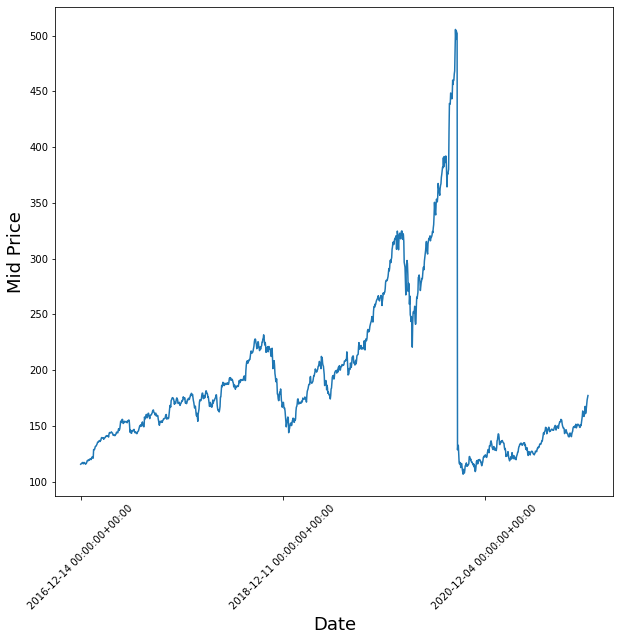

In [64]:
plt.figure(figsize = (10,9))
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

### Correlation 

In [35]:
#Calculate Correlation 
df.corr()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999513,0.999519,0.999086,-0.319254,-0.061847,-0.062347,-0.063934,-0.064267,0.266252,0.047252,-0.024303
high,0.999513,1.000000,0.999302,0.999560,-0.309976,-0.059912,-0.059861,-0.061836,-0.061770,0.280734,0.047039,-0.023974
low,0.999519,0.999302,1.000000,0.999519,-0.328015,-0.065626,-0.065965,-0.067168,-0.067536,0.254656,0.047695,-0.025099
open,0.999086,0.999560,0.999519,1.000000,-0.317762,-0.062928,-0.062867,-0.064501,-0.064299,0.268855,0.048991,-0.024900
volume,-0.319254,-0.309976,-0.328015,-0.317762,1.000000,0.694961,0.702421,0.689628,0.698055,0.335928,-0.040260,0.125866
adjClose,-0.061847,-0.059912,-0.065626,-0.062928,0.694961,1.000000,0.999766,0.999764,0.999543,-0.126947,-0.028515,0.039590
adjHigh,-0.062347,-0.059861,-0.065965,-0.062867,0.702421,0.999766,1.000000,0.999676,0.999807,-0.118046,-0.028725,0.040003
adjLow,-0.063934,-0.061836,-0.067168,-0.064501,0.689628,0.999764,0.999676,1.000000,0.999739,-0.134626,-0.028353,0.038520
adjOpen,-0.064267,-0.061770,-0.067536,-0.064299,0.698055,0.999543,0.999807,0.999739,1.000000,-0.125265,-0.027785,0.038647
adjVolume,0.266252,0.280734,0.254656,0.268855,0.335928,-0.126947,-0.118046,-0.134626,-0.125265,1.000000,0.009104,0.052012


<AxesSubplot:>

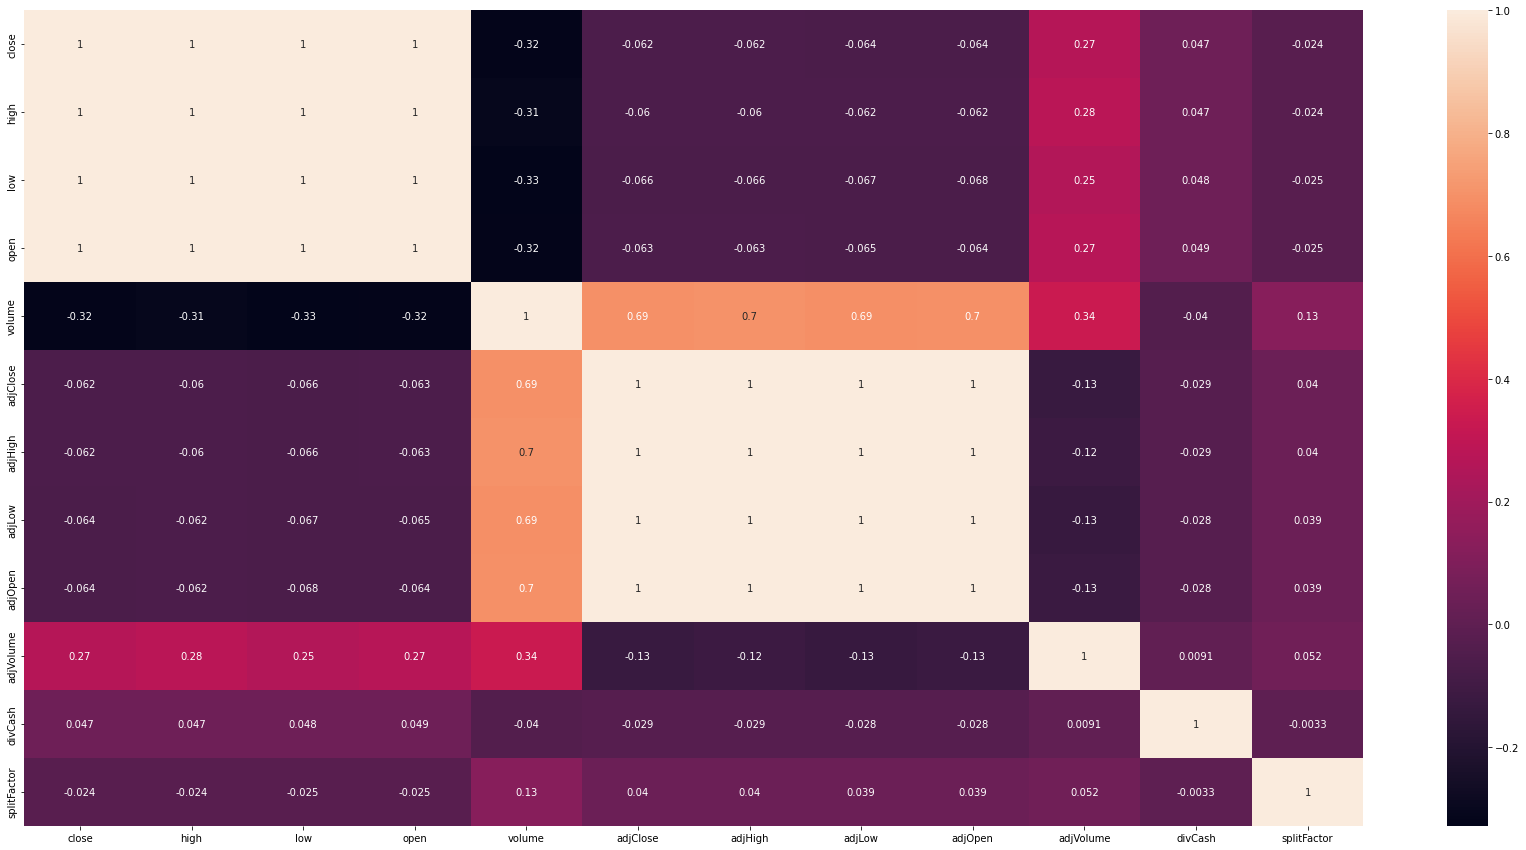

In [40]:
#Creating a correlation heta map
plt.figure(figsize = (30, 15))
sns.heatmap(df.corr(),annot=True)

### Stock prediction 

In [41]:
#Here the target variable is "Close", for this closing price Im doing the stock prediction

In [42]:
df_close = df.reset_index()['close']

In [43]:
df_close.shape

(1257,)

In [44]:
df_close

0       115.19
1       115.82
2       115.97
3       116.64
4       116.95
         ...  
1252    165.32
1253    171.18
1254    175.08
1255    174.56
1256    179.45
Name: close, Length: 1257, dtype: float64

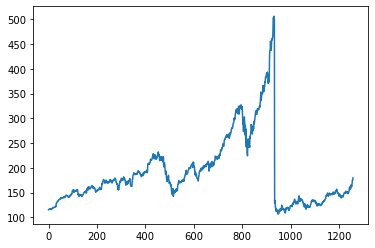

In [45]:
#plotting the 'close' dataframe

plt.plot(df_close)

In [46]:
#Here you can see a steep and sudden downfall of the stock 

### Normalizing the Data

### Long Short-Term Memory(LSTM) 

LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

MinMaxScalar scales all the data to be in the region of 0 and 1. 

When scaling remember! You normalize both test and train data with respect to training data

Because we are not supposed to have access to test data

In [70]:
# Using sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [71]:
print(df_close)  # It will transform into an array and will have values between 0 to 1

[[0.02091421]
 [0.02249217]
 [0.02286788]
 ...
 [0.17092048]
 [0.16961803]
 [0.181866  ]]


In [72]:
df_close.shape

(1257, 1)

In [73]:
#Splitting the dataset into training and testing
training_size = int(len(df_close)*0.65) # training set is divided int 65% from the whole 
test_size = len(df_close)-training_size  # the remaining 35% is test set
train_data,test_data = df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

In [74]:
training_size, test_size  # this gives the training(817) and testing values(440)

(817, 440)

In [76]:
len(train_data)

817

In [77]:
len(test_data)

440

In [78]:
len(train_data),len(test_data)

(817, 440)

### Data preprocessing

In [79]:
# if we need tomorrows o/p, how many previous days we need to consider or need to be dependent on 

In [81]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   y = 100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [87]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [88]:
# Print x_train and y_train shape
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [89]:
#Print y_train and y_test
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [93]:
#Creating a stacked LSTM model
# reshape the x_tarin into 3 dimensions 
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # the 3-dimesion is (716,time_step=100,1(it gets converted into 3 dimsion))
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [94]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
# Loss started from 0.0152 and lowering, and the validation loss also is decreasing 
# The main aim is to minimise the loss

Epoch 1/100
12/12 [==============================] - 5s 408ms/step - loss: 0.0152 - val_loss: 0.0180
Epoch 2/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0046 - val_loss: 0.0242
Epoch 3/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0018 - val_loss: 0.0195
Epoch 4/100
12/12 [==============================] - 2s 193ms/step - loss: 9.4602e-04 - val_loss: 0.0207
Epoch 5/100
12/12 [==============================] - 2s 185ms/step - loss: 7.4001e-04 - val_loss: 0.0209
Epoch 6/100
12/12 [==============================] - 2s 172ms/step - loss: 7.1229e-04 - val_loss: 0.0202
Epoch 7/100
12/12 [==============================] - 2s 181ms/step - loss: 6.8949e-04 - val_loss: 0.0205
Epoch 8/100
12/12 [==============================] - 2s 184ms/step - loss: 6.6665e-04 - val_loss: 0.0191
Epoch 9/100
12/12 [==============================] - 2s 207ms/step - loss: 6.7037e-04 - val_loss: 0.0186
Epoch 10/100
12/12 [==============================] - 2s 181ms/step

### Predit the test data and plot the output 

In [98]:
import tensorflow as tf

In [99]:
tf.__version__

'2.3.0'

In [101]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train) # output for the train dataset
test_predict=model.predict(X_test)

In [102]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [104]:
### Calculate RMSE performance metrics
import math
#Train data RMSE value
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

197.8757163464656

In [105]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

167.0943709413726

In [106]:
# The difference between the RMSE values of train and test is very less, this implies the LMSE model has done a good work 

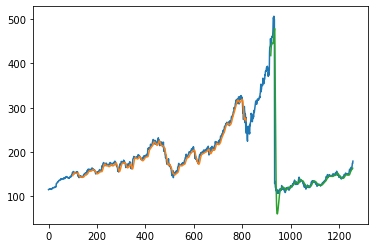

In [109]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [110]:
#green colour gives the test data(predicted o/p for test data),
#blue color is the complete dataset, 
#predictions on the training datset is shown using orange

### Predict the future 30 days and plot the o/p

In [111]:
len(test_data)

440

In [112]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [113]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [114]:
temp_input # all the data from test_data, # this is data of 100 days

[0.10008766437069505,
 0.10449592986850342,
 0.1055729492798998,
 0.10001252348152784,
 0.0955291170945522,
 0.09718221665623034,
 0.0977332498434565,
 0.09688165309956165,
 0.10149029430181589,
 0.10046336881653095,
 0.10073888541014397,
 0.09843456480901686,
 0.0983093299937382,
 0.09708202880400746,
 0.0977332498434565,
 0.10532247964934244,
 0.10584846587351276,
 0.11090795241077017,
 0.10857858484658728,
 0.09898559799624296,
 0.09983719474013769,
 0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,

In [115]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15101908]
101
1 day input [0.10449593 0.10557295 0.10001252 0.09552912 0.09718222 0.09773325
 0.09688165 0.10149029 0.10046337 0.10073889 0.09843456 0.09830933
 0.09708203 0.09773325 0.10532248 0.10584847 0.11090795 0.10857858
 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091 0.10399499
 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483
 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558
 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684
 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397  0.09014402
 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618
 0.09031935 0.09009393 0.08683782 0.085335   0.09247339 0.09517846
 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292
 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465
 0.13452724 0.13570445 0.13668128

### Ploting 

In [116]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131) # 30 Days future 

In [120]:
import matplotlib.pyplot as plt

In [121]:
len(df_close)

1257

In [122]:
scaler.inverse_transform(lst_output)

array([[167.13436828],
       [168.68310494],
       [169.55958983],
       [169.86359848],
       [169.76168716],
       [169.40274873],
       [168.89366216],
       [168.30180313],
       [167.66574089],
       [167.00618491],
       [166.33389745],
       [165.65486944],
       [164.97296793],
       [164.2912211 ],
       [163.61232993],
       [162.93873363],
       [162.27260963],
       [161.61577842],
       [160.96972732],
       [160.33559265],
       [159.7141954 ],
       [159.10602938],
       [158.51140393],
       [157.93037856],
       [157.36291756],
       [156.80883652],
       [156.26787365],
       [155.73968094],
       [155.22391926],
       [154.7201692 ]])

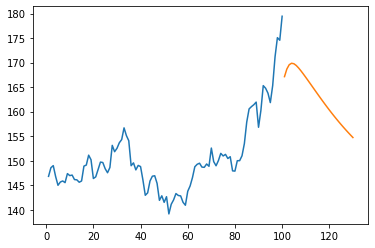

In [139]:
plt.plot(day_new,scaler.inverse_transform(df_close[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')




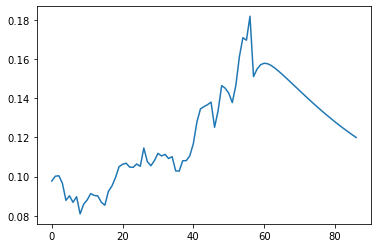

In [141]:
df3=df_close.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
# its falling down 

In [142]:
df3=scaler.inverse_transform(df3).tolist()

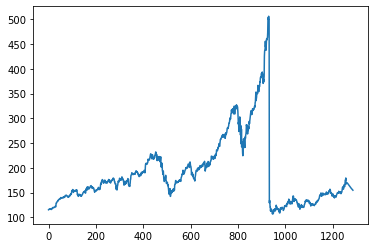

In [143]:
plt.plot(df3)